In [163]:
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import gmaps
import gmaps.datasets
import numpy as np
from config import gkey
import seaborn as sns

In [46]:
traffic_df = pd.read_csv('Resources/traffic (main).csv')
traffic_df.head()

,Unnamed: 0,Address,Issue Reported,Latitude,Location,Longitude,Date Time Published,Traffic Report ID,Traffic Report Status (TRS),TRS Date Time,Date,Time
0,0,5400 Brodie Ln,Accident/Collision,30.230326,"(30.2303264,-97.8199774)",-97.819977,2017-09-26T11:11:00.000,EC10DB9185C9C58A004FA683DD21AFCD16CAD418,ARCHIVED,2018-05-17T20:00:00.000,2017-09-26,11:11:00
1,1,8800 Corran Ferry Dr,Accident/Collision,30.201610,"(30.2016097,-97.8530411)",-97.853041,2017-09-26T11:19:00.000,B25B748A59D8B6B5B5AE3E9D985289E795C874ED,ARCHIVED,2018-05-17T20:00:00.000,2017-09-26,11:19:00
2,2,N Lamar Blvd Nb & Morrow St,Accident/Collision,30.343978,"(30.3439776,-97.7149716)",-97.714972,2017-09-26T11:55:00.000,B17F4787F2799F2665E5F119FC2F47D569212C4C,ARCHIVED,2018-05-17T20:00:00.000,2017-09-26,11:55:00
3,3,11000 Fm 2222 Rd,Accident/Collision,30.396632,"(30.3966315,-97.8487281)",-97.848728,2017-09-26T12:08:00.000,15D1EE116284B85E5DE3E00564518367FE994DE7,ARCHIVED,2018-05-17T20:00:00.000,2017-09-26,12:08:00
4,4,Mount Bonnell Rd & Tortuga Trl,Accident/Collision,30.339233,"(30.339233,-97.7779837)",-97.777984,2017-09-26T12:20:00.000,89CA91E6C9B28BDCFB629B12758F955D21072594,ARCHIVED,2018-05-17T20:00:00.000,2017-09-26,12:20:00


In [182]:
publish_time = traffic_df['Date Time Published'].str.split("T", n= 1, expand= True)
publish_time = publish_time[1].str.split(".", n= 1, expand= True)
publish_time = publish_time[0].str.split(":", n=1, expand= True)
publish_time = publish_time[0]
count = pd.value_counts(publish_time.values)
#traffic_df['Date'].value_counts()
average = count/431
average

12    13.208817
11    12.278422
08    11.178654
13    11.153132
10    10.914153
07    10.795824
09    10.638051
16     9.359629
14     9.359629
17     8.763341
15     8.700696
06     8.371230
18     7.429234
02     6.728538
05     6.310905
03     6.046404
04     5.691415
19     5.689095
01     5.197216
20     4.651972
21     4.167053
00     3.396752
22     3.051044
23     2.730858
dtype: float64

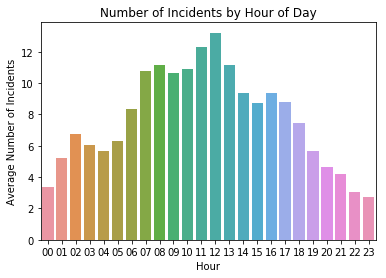

In [186]:
sns.barplot(count.index, average)
plt.title("Number of Incidents by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Average Number of Incidents")
plt.savefig("../Deliverables/Number of Incidents by Hour of Day.png")